In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv("C:/Users/anikr/Desktop/Machine_Learning/Datasets/loan-train.csv")
data2 = pd.read_csv("C:/Users/anikr/Desktop/Machine_Learning/Datasets/loan-test.csv")

In [5]:
#1 understainding the data

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001350,Male,Yes,NaN,Graduate,No,17063,0,221.426768,360.0,1.0,Urban,Y
1,LP001213,Male,Yes,1,Graduate,No,6181,0,221.426768,360.0,0.0,Rural,N
2,LP002401,Male,Yes,0,Graduate,No,2766,1406,221.426768,360.0,1.0,Urban,Y
3,LP002697,Male,No,0,Graduate,No,5850,2609,221.426768,360.0,1.0,Semiurban,N
4,LP002533,Male,Yes,2,Graduate,No,3684,2004,221.426768,360.0,1.0,Urban,N


In [7]:
data.tail() #last 5 data sets

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
809,LP002191,Male,Yes,0,Graduate,No,24663,6583,713.0,360.0,1.0,Rural,N
810,LP001536,Male,Yes,3+,Graduate,No,49999,0,750.0,180.0,0.0,Semiurban,Y
811,LP002813,Female,Yes,1,Graduate,Yes,24355,0,750.0,360.0,1.0,Semiurban,Y
812,LP001469,Male,No,0,Graduate,Yes,25208,0,813.0,480.0,NaN,Urban,Y
813,LP001585,NaN,Yes,3+,Graduate,No,64704,0,875.0,300.0,1.0,Urban,Y


In [8]:
data.shape #rows and column

(814, 13)

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,814.000000,814.000000,809.000000,800.000000,764.000000
mean,8468.918919,2607.565111,222.120382,315.075000,0.739529
std,7986.949645,3836.744926,133.833480,88.545156,0.439179
min,188.000000,0.000000,11.000000,12.000000,0.000000
25%,3843.250000,0.000000,138.000000,300.000000,0.000000
50%,5718.500000,1880.000000,179.000000,360.000000,1.000000
75%,10417.500000,3791.000000,261.000000,360.000000,1.000000
max,101250.000000,52084.000000,875.000000,480.000000,1.000000


In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Checked missing percentage
data.isnull().sum() * 100/len(data) 

Loan_ID              0.000000
Gender               1.597052
Married              0.368550
Dependents           1.842752
Education            0.000000
Self_Employed        3.931204
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.614251
Loan_Amount_Term     1.719902
Credit_History       6.142506
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
data.nunique()

Loan_ID              814
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      697
CoapplicantIncome    417
LoanAmount           303
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            814 non-null    object 
 1   Gender             801 non-null    object 
 2   Married            811 non-null    object 
 3   Dependents         799 non-null    object 
 4   Education          814 non-null    object 
 5   Self_Employed      782 non-null    object 
 6   ApplicantIncome    814 non-null    int64  
 7   CoapplicantIncome  814 non-null    int64  
 8   LoanAmount         809 non-null    float64
 9   Loan_Amount_Term   800 non-null    float64
 10  Credit_History     764 non-null    float64
 11  Property_Area      814 non-null    object 
 12  Loan_Status        814 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 82.8+ KB


In [14]:
#2. Individual Histogram for the numerical features ( 3 plots )

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

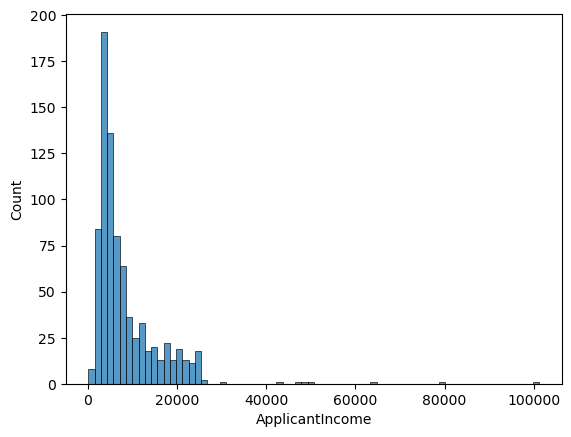

In [15]:
sns.histplot(data,x='ApplicantIncome')

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

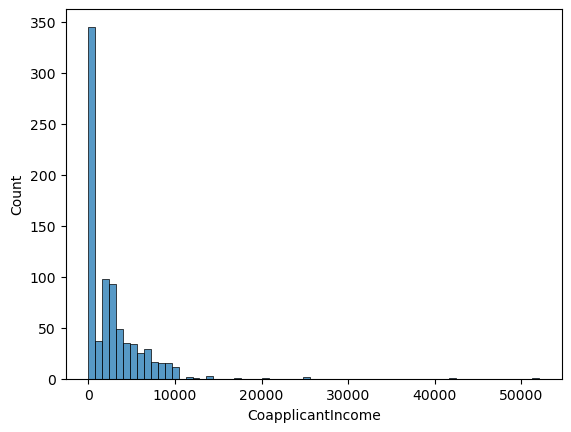

In [16]:
sns.histplot(data,x='CoapplicantIncome')

<Axes: xlabel='LoanAmount', ylabel='Count'>

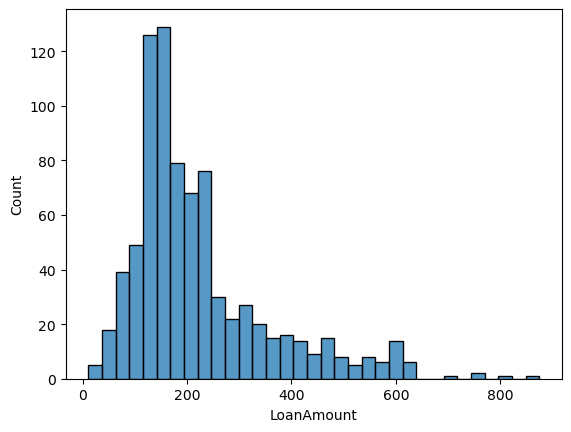

In [17]:
sns.histplot(data,x='LoanAmount')

In [18]:
#3. Individual Bar Chart for the categorical features  ( 6 plots )

<Axes: xlabel='Loan_Status', ylabel='count'>

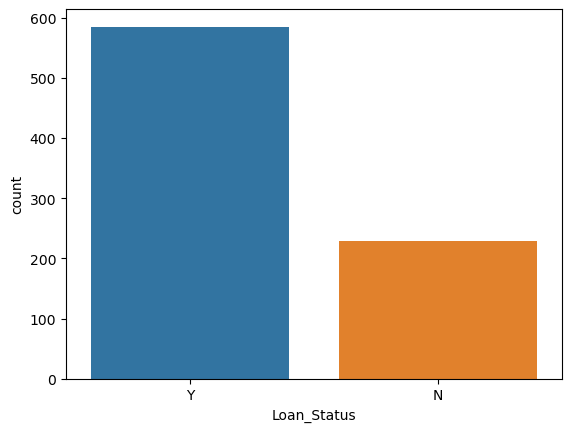

In [19]:
sns.countplot(x="Loan_Status",data=data)

<Axes: xlabel='Married', ylabel='count'>

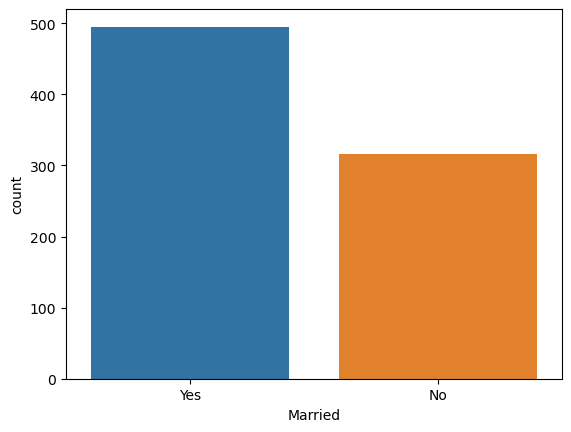

In [20]:
sns.countplot(x="Married",data=data)

<Axes: xlabel='Education', ylabel='count'>

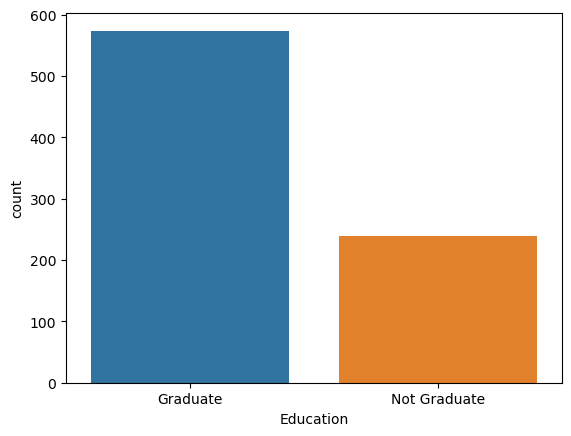

In [21]:
sns.countplot(x="Education",data=data)

<Axes: xlabel='Self_Employed', ylabel='count'>

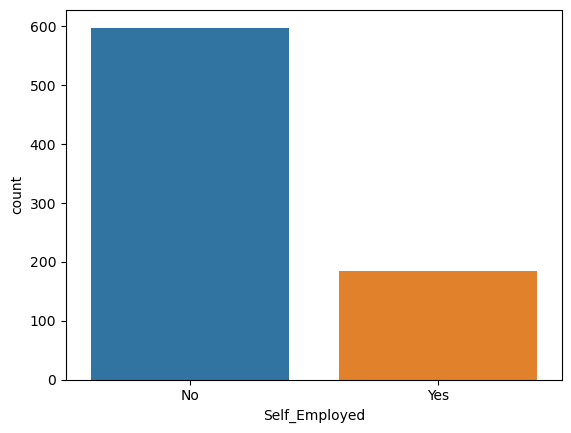

In [22]:
sns.countplot(x="Self_Employed",data=data)

<Axes: xlabel='Property_Area', ylabel='count'>

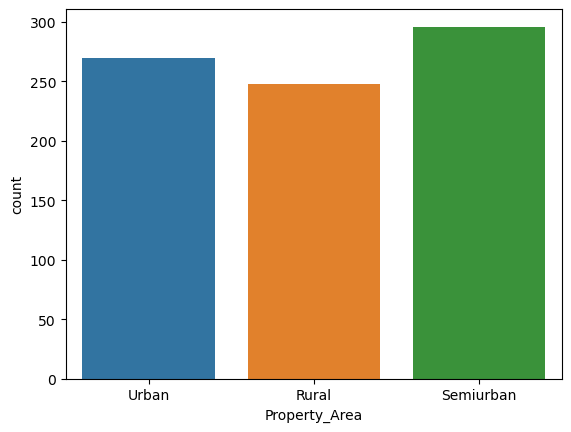

In [23]:
sns.countplot(x="Property_Area",data=data)

<Axes: xlabel='Dependents', ylabel='count'>

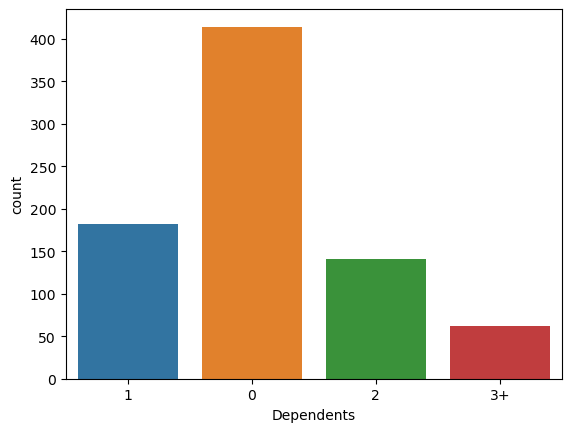

In [24]:
sns.countplot(x="Dependents",data=data)

In [25]:
#4. Bar plot for Categorical vs categorical  ( 6 plots )

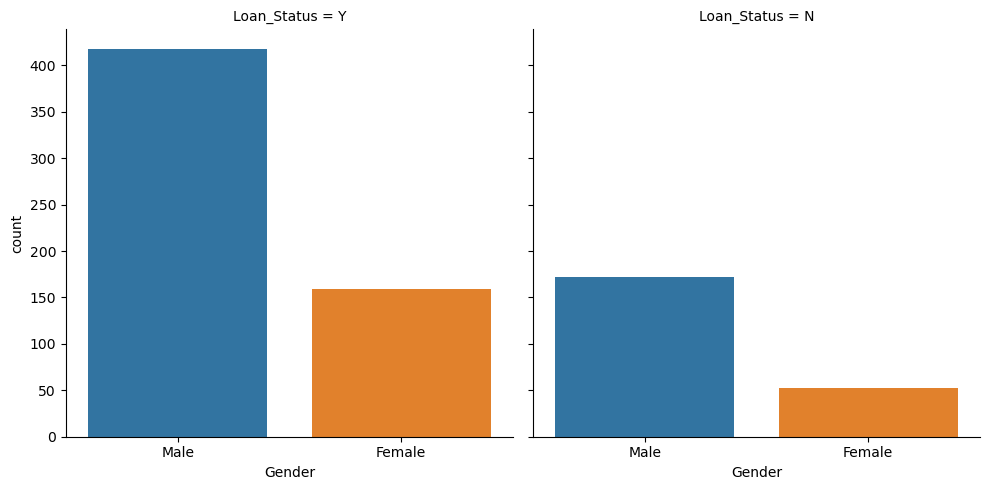

In [26]:
sns.catplot(x="Gender",col = "Loan_Status",kind = "count",data = data)

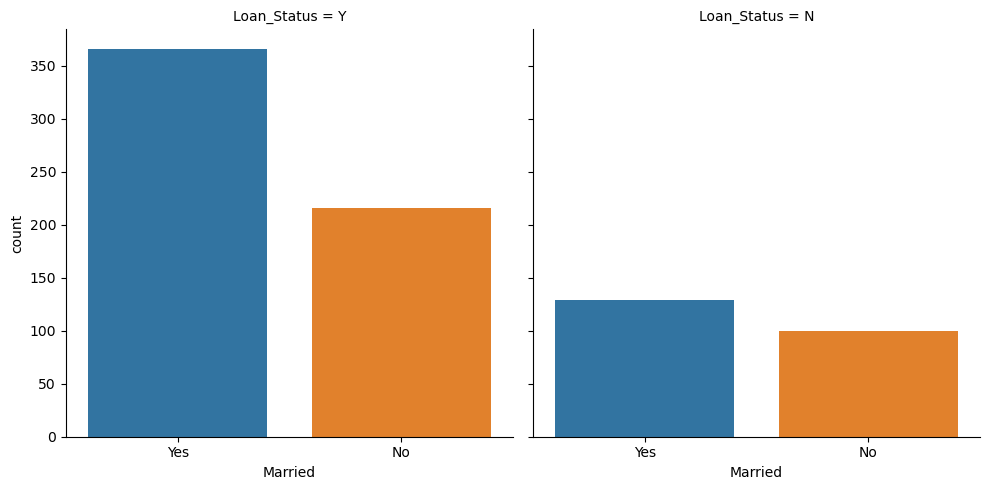

In [27]:
sns.catplot(x="Married",col = "Loan_Status",kind = "count",data = data)

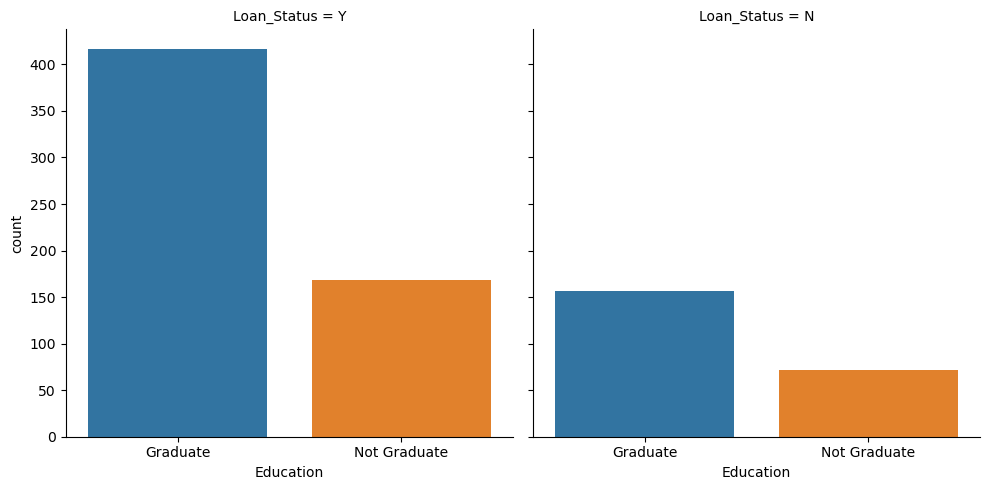

In [28]:
sns.catplot(x="Education",col = "Loan_Status",kind = "count",data = data)

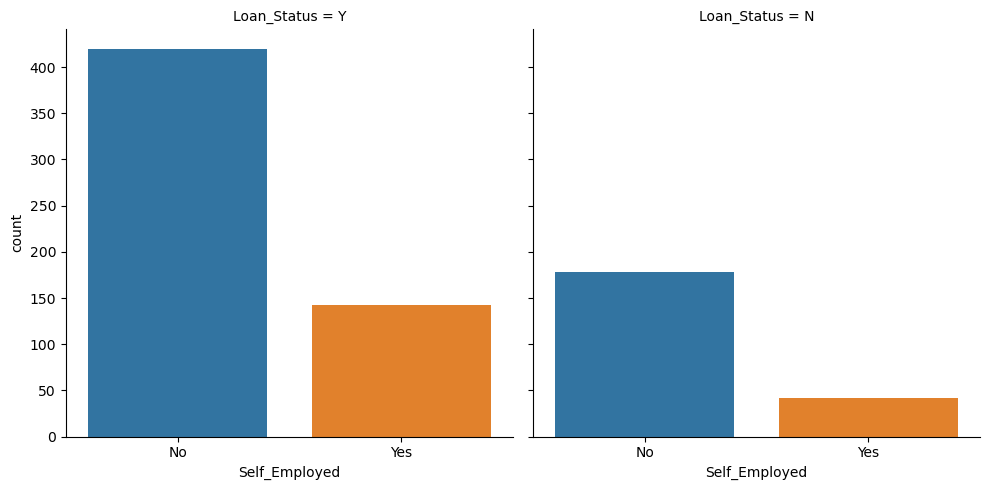

In [29]:
sns.catplot(x="Self_Employed",col = "Loan_Status",kind = "count",data = data)

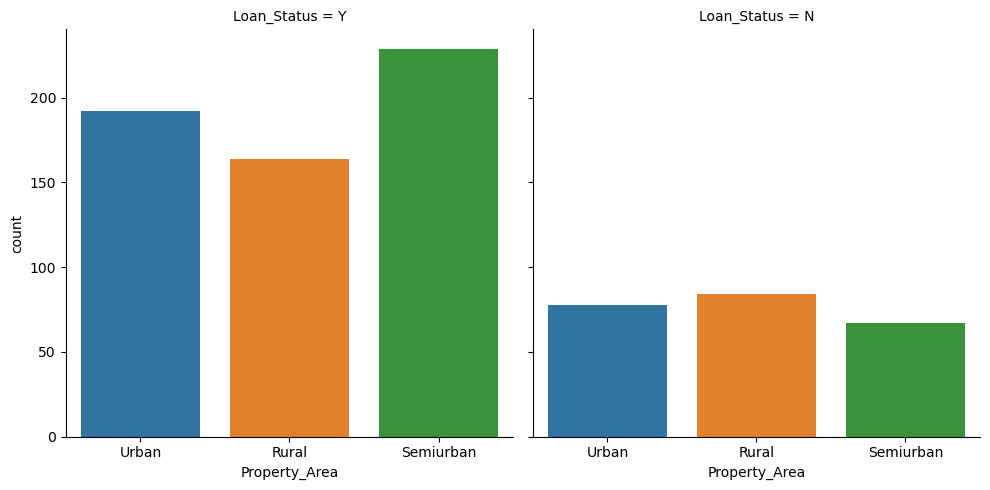

In [30]:
sns.catplot(x="Property_Area",col = "Loan_Status",kind = "count",data = data)

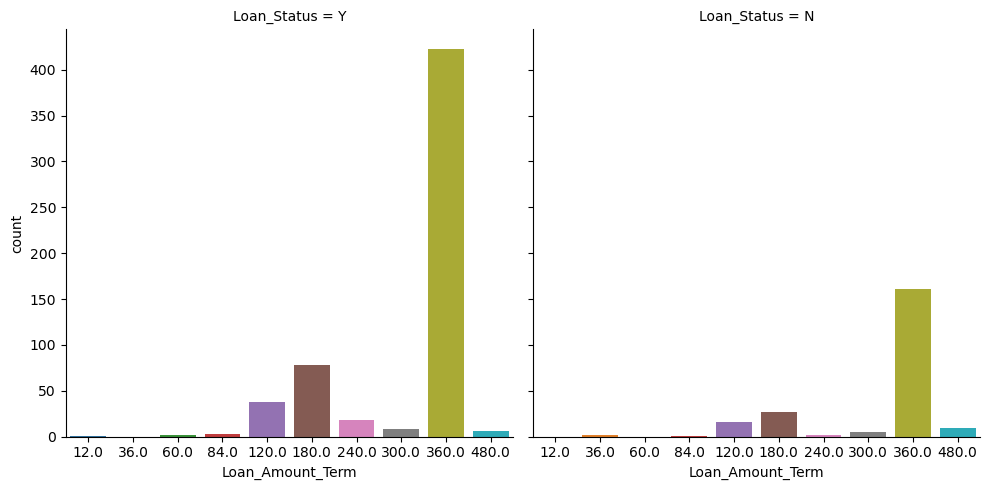

In [31]:
sns.catplot(x="Loan_Amount_Term",col = "Loan_Status",kind = "count",data = data)

In [32]:
#5. Categorical vs Numerical ( with different colors ) ( 3 plots )

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

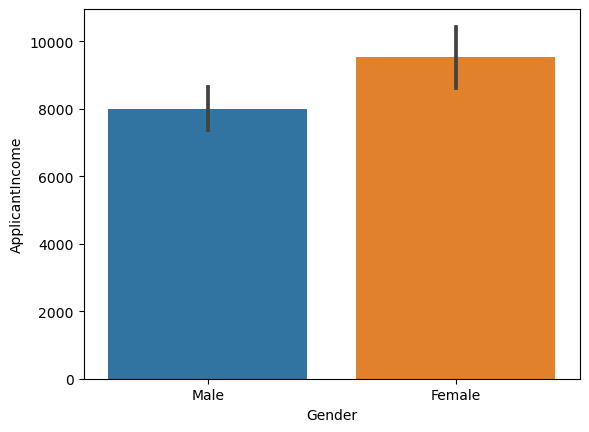

In [33]:
sns.barplot(x="Gender", y="ApplicantIncome",data=data)

<Axes: xlabel='Education', ylabel='LoanAmount'>

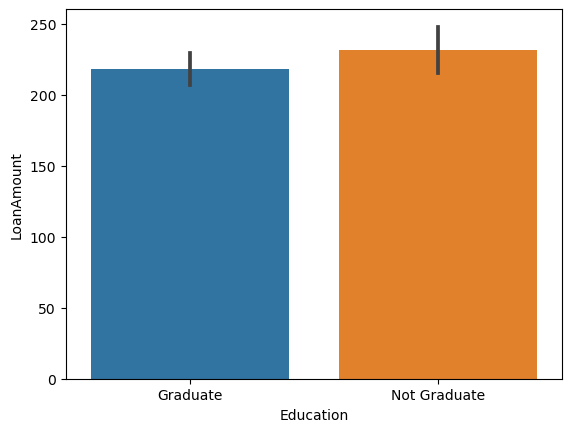

In [34]:
sns.barplot(x="Education", y="LoanAmount", data=data)

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

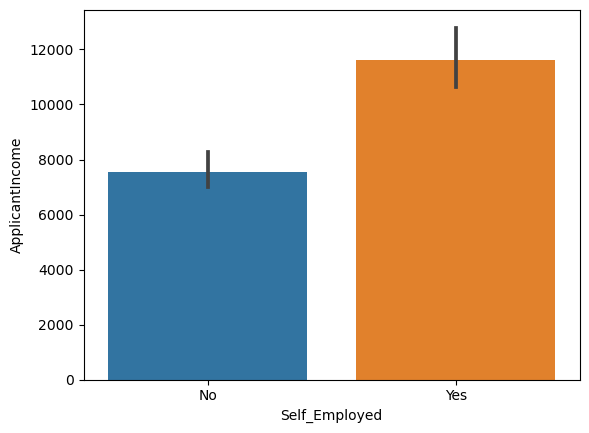

In [35]:
sns.barplot(x="Self_Employed", y="ApplicantIncome", data=data)

In [36]:
#6.  Numerical vs Numerical pairplot ( 3 plots ) 

In [37]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

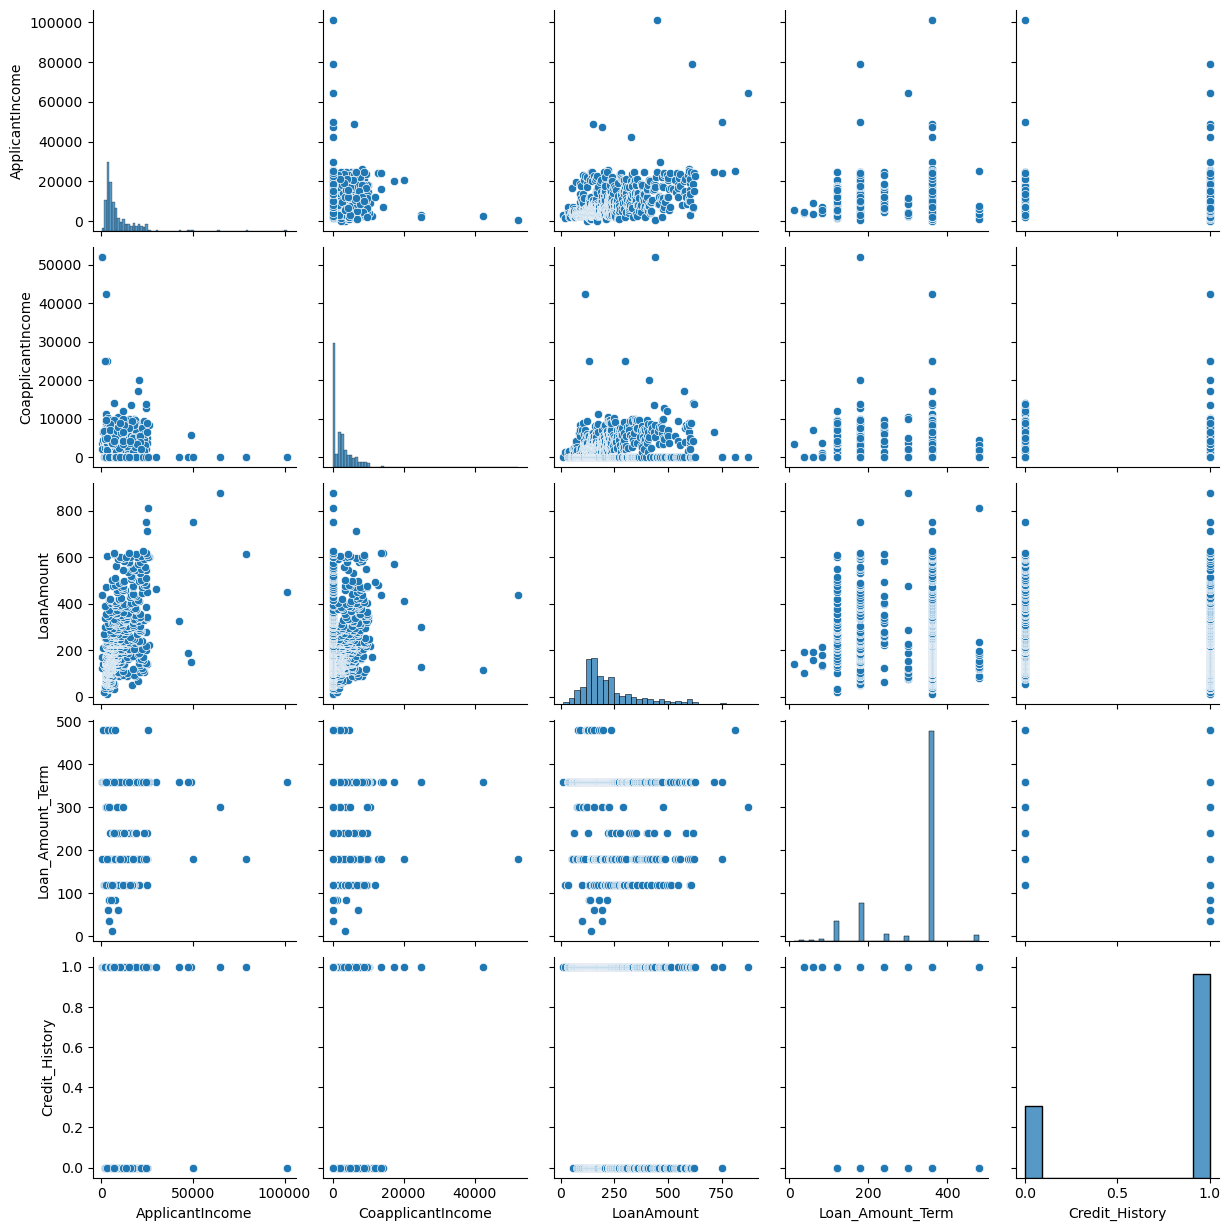

In [38]:
sns.pairplot(data)

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

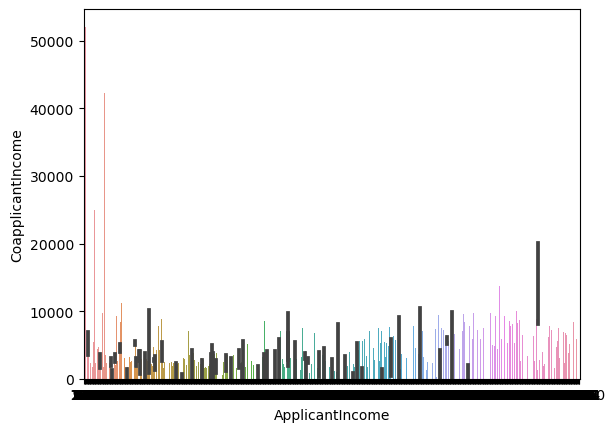

In [39]:
sns.barplot(x="ApplicantIncome", y="CoapplicantIncome", data=data)

In [40]:
#7. Missing data handling 

In [41]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
#Checked missing percentage
data.isnull().sum() #train


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
data2.isnull().sum() #test

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [44]:
data.isnull().sum() * 100/len(data) #train

Loan_ID              0.000000
Gender               1.597052
Married              0.368550
Dependents           1.842752
Education            0.000000
Self_Employed        3.931204
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.614251
Loan_Amount_Term     1.719902
Credit_History       6.142506
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [45]:
#Numerical missing data handling
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [46]:
data.isnull().sum()  #checking again train

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
#Categorical missing data handling
data['Gender'].mode()[0]

'Male'

In [48]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [49]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
data['Total_income'] = data['ApplicantIncome']+data['CoapplicantIncome']

In [56]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog
0,LP001350,Male,Yes,0,Graduate,No,17063,0,221.426768,360.0,1.0,Urban,Y,17063,9.744668,-inf
1,LP001213,Male,Yes,1,Graduate,No,6181,0,221.426768,360.0,0.0,Rural,N,6181,8.729235,-inf
2,LP002401,Male,Yes,0,Graduate,No,2766,1406,221.426768,360.0,1.0,Urban,Y,4172,7.925158,7.248504
3,LP002697,Male,No,0,Graduate,No,5850,2609,221.426768,360.0,1.0,Semiurban,N,8459,8.674197,7.866722
4,LP002533,Male,Yes,2,Graduate,No,3684,2004,221.426768,360.0,1.0,Urban,N,5688,8.211754,7.602900


In [57]:
data['ApplicantIncomeLog'] = np.log(data['ApplicantIncome'])

In [58]:
data['CoapplicantIncomeLog'] = np.log(data['CoapplicantIncome'])

C:\Users\anikr\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
data['LoanAmountLog'] = np.log(data['LoanAmount'])

In [60]:
data['Loan_Amount_Term_Log'] = np.log(data['Loan_Amount_Term'])

In [61]:
data['Total_Income_Log'] = np.log(data['Total_income'])

In [62]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001350,Male,Yes,0,Graduate,No,17063,0,221.426768,360.0,1.0,Urban,Y,17063,9.744668,-inf,5.400092,5.886104,9.744668
1,LP001213,Male,Yes,1,Graduate,No,6181,0,221.426768,360.0,0.0,Rural,N,6181,8.729235,-inf,5.400092,5.886104,8.729235
2,LP002401,Male,Yes,0,Graduate,No,2766,1406,221.426768,360.0,1.0,Urban,Y,4172,7.925158,7.248504,5.400092,5.886104,8.336151
3,LP002697,Male,No,0,Graduate,No,5850,2609,221.426768,360.0,1.0,Semiurban,N,8459,8.674197,7.866722,5.400092,5.886104,9.042986
4,LP002533,Male,Yes,2,Graduate,No,3684,2004,221.426768,360.0,1.0,Urban,N,5688,8.211754,7.602900,5.400092,5.886104,8.646114


In [63]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
data = data.drop(columns=cols, axis=1)

In [64]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,0,Graduate,No,1.0,Urban,Y,9.744668,5.400092,5.886104,9.744668
1,Male,Yes,1,Graduate,No,0.0,Rural,N,8.729235,5.400092,5.886104,8.729235
2,Male,Yes,0,Graduate,No,1.0,Urban,Y,7.925158,5.400092,5.886104,8.336151
3,Male,No,0,Graduate,No,1.0,Semiurban,N,8.674197,5.400092,5.886104,9.042986
4,Male,Yes,2,Graduate,No,1.0,Urban,N,8.211754,5.400092,5.886104,8.646114


In [65]:
data.Loan_Status.value_counts()

Y    585
N    229
Name: Loan_Status, dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                814 non-null    object 
 1   Married               814 non-null    object 
 2   Dependents            814 non-null    object 
 3   Education             814 non-null    object 
 4   Self_Employed         814 non-null    object 
 5   Credit_History        814 non-null    float64
 6   Property_Area         814 non-null    object 
 7   Loan_Status           814 non-null    object 
 8   ApplicantIncomeLog    814 non-null    float64
 9   LoanAmountLog         814 non-null    float64
 10  Loan_Amount_Term_Log  814 non-null    float64
 11  Total_Income_Log      814 non-null    float64
dtypes: float64(5), object(7)
memory usage: 76.4+ KB


In [67]:
data.Education.value_counts()

Graduate        574
Not Graduate    240
Name: Education, dtype: int64

In [68]:
d1 = pd.get_dummies(data['Gender'], drop_first= True)
d2 = pd.get_dummies(data['Married'], drop_first= True)
d3 = pd.get_dummies(data['Dependents'], drop_first= True)
d4 = pd.get_dummies(data['Education'], drop_first= True)
d5 = pd.get_dummies(data['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(data['Property_Area'], drop_first= True)



data1 = pd.concat([data, d1, d2, d3, d4, d5, d6], axis = 1)
data=data1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
data = data.drop(columns=cols, axis=1)

In [69]:
data.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,9.744668,5.400092,5.886104,9.744668,1,1,0,0,0,0,0,0,1
1,0.0,N,8.729235,5.400092,5.886104,8.729235,1,1,1,0,0,0,0,0,0
2,1.0,Y,7.925158,5.400092,5.886104,8.336151,1,1,0,0,0,0,0,0,1
3,1.0,N,8.674197,5.400092,5.886104,9.042986,1,0,0,0,0,0,0,1,0
4,1.0,N,8.211754,5.400092,5.886104,8.646114,1,1,0,1,0,0,0,0,1


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credit_History        814 non-null    float64
 1   Loan_Status           814 non-null    object 
 2   ApplicantIncomeLog    814 non-null    float64
 3   LoanAmountLog         814 non-null    float64
 4   Loan_Amount_Term_Log  814 non-null    float64
 5   Total_Income_Log      814 non-null    float64
 6   Male                  814 non-null    uint8  
 7   Yes                   814 non-null    uint8  
 8   1                     814 non-null    uint8  
 9   2                     814 non-null    uint8  
 10  3+                    814 non-null    uint8  
 11  Not Graduate          814 non-null    uint8  
 12  Yes                   814 non-null    uint8  
 13  Semiurban             814 non-null    uint8  
 14  Urban                 814 non-null    uint8  
dtypes: float64(5), object(1

In [71]:
data.describe()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,0.739529,8.761385,5.246795,5.692557,9.083706,0.740786,0.611794,0.223587,0.173219,0.076167,0.294840,0.226044,0.363636,0.331695
std,0.425460,0.729035,0.561746,0.395865,0.646697,0.438473,0.487642,0.416905,0.378669,0.265428,0.456251,0.418525,0.481341,0.471112
min,0.000000,5.236442,2.397895,2.484907,7.411556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.739529,8.254074,4.927254,5.752811,8.640295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.651460,5.192957,5.886104,8.958025,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.251242,5.559718,5.886104,9.526878,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,11.525348,6.774224,6.173786,11.525348,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
test = pd.read_csv("C:/Users/anikr/Desktop/Machine_Learning/Datasets/loan-test.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

# apply log transformation to the attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])

test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])

test['LoanAmountLog'] = np.log(test['LoanAmount'])

test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])

test['Total_Income_Log'] = np.log(test['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
test = test.drop(columns=cols, axis=1)

t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)



data1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test = data1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
test = test.drop(columns=cols, axis=1)

C:\Users\anikr\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\anikr\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\anikr\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.874868,4.927254,5.886104,8.874868,1,1,0,0,0,0,0,0,1
1,1.000000,8.254529,5.062595,5.886104,8.651724,1,1,1,0,0,0,0,0,1
2,1.000000,8.740337,5.560682,5.886104,9.047821,1,1,0,1,0,0,0,0,1
3,0.825444,7.981050,4.828314,5.886104,8.717355,1,1,0,1,0,0,0,0,1
4,1.000000,8.317522,4.584967,5.886104,8.317522,1,0,0,0,0,1,0,0,1


In [76]:
#11. Correlation Matrix 

In [77]:
data.corr()

C:\Users\anikr\AppData\Local\Temp\ipykernel_13700\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
Credit_History,1.000000,-0.186594,-0.217911,0.184632,-0.208199,0.137840,0.061288,-0.095140,-0.006386,-0.017778,-0.125925,-0.158161,0.041634,0.000723
ApplicantIncomeLog,-0.186594,1.000000,0.532239,-0.230076,0.827210,-0.099458,-0.067642,0.195538,0.001290,0.051431,0.009502,0.277425,-0.009578,-0.012070
LoanAmountLog,-0.217911,0.532239,1.000000,-0.169187,0.634786,-0.068217,0.034543,0.126933,0.053549,0.048902,0.046838,0.246107,-0.002904,-0.067450
Loan_Amount_Term_Log,0.184632,-0.230076,-0.169187,1.000000,-0.258410,0.132191,0.055876,-0.175480,-0.045905,0.023035,-0.195442,-0.206088,0.046755,-0.037938
Total_Income_Log,-0.208199,0.827210,0.634786,-0.258410,1.000000,-0.077572,-0.000568,0.186766,0.002834,0.049057,-0.002594,0.275619,-0.032218,-0.010247
Male,0.137840,-0.099458,-0.068217,0.132191,-0.077572,1.000000,0.276635,-0.146841,0.107782,0.095871,-0.047888,-0.169608,-0.048213,0.035654
Yes,0.061288,-0.067642,0.034543,0.055876,-0.000568,0.276635,1.000000,0.022105,0.184761,0.105187,-0.037762,-0.057677,0.025725,-0.022403
1,-0.095140,0.195538,0.126933,-0.175480,0.186766,-0.146841,0.022105,1.000000,-0.245629,-0.154086,0.099190,0.125902,-0.001114,0.047792
2,-0.006386,0.001290,0.053549,-0.045905,0.002834,0.107782,0.184761,-0.245629,1.000000,-0.131428,0.003044,0.024275,-0.022085,0.022277
3+,-0.017778,0.051431,0.048902,0.023035,0.049057,0.095871,0.105187,-0.154086,-0.131428,1.000000,0.017469,-0.033380,0.004376,-0.015395


C:\Users\anikr\AppData\Local\Temp\ipykernel_13700\3745576415.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr());


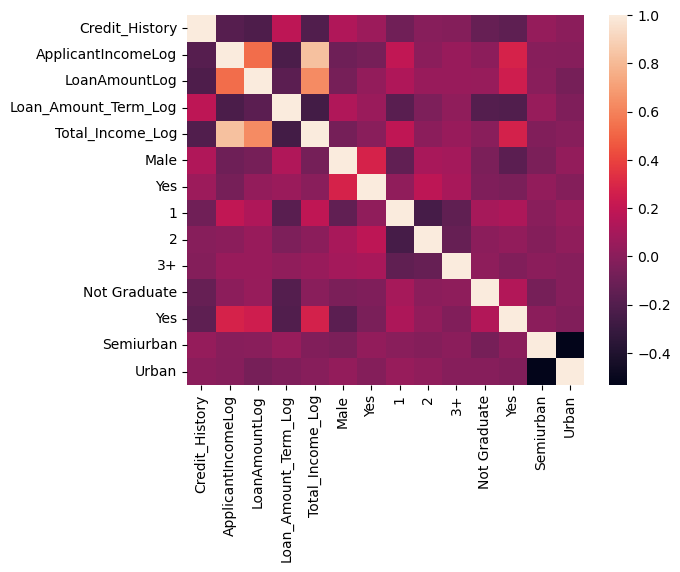

In [78]:
sns.heatmap(data.corr());

In [79]:
##data.drop("Loan_ID", axis=1,inplace=True) 

In [80]:
#8. Stratified sampling on output class

In [81]:
data['Loan_Status'].value_counts()/len(data)*100

Y    71.867322
N    28.132678
Name: Loan_Status, dtype: float64

In [82]:
data.groupby('Loan_Status', group_keys=False).apply(lambda x: x.sample(4))

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
206,0.000000,N,9.002701,4.875197,5.886104,9.002701,1,0,0,0,0,0,0,0,0
496,1.000000,N,9.251290,5.298317,5.886104,9.251290,1,1,0,0,0,0,0,1,0
174,1.000000,N,8.086410,4.820282,5.703782,8.593413,0,0,0,0,0,0,1,1,0
353,0.000000,N,8.363576,5.075174,5.886104,8.674368,1,1,0,0,1,0,0,1,0
192,0.739529,Y,8.235095,4.852030,5.886104,8.433812,0,1,0,0,0,1,0,1,0
497,1.000000,Y,8.789203,5.298317,5.886104,8.912339,1,1,1,0,0,0,0,0,0
398,1.000000,Y,8.455956,5.129899,5.886104,8.822617,0,0,0,0,0,0,0,0,0
508,1.000000,Y,9.787796,5.327876,4.787492,10.178768,1,0,1,0,0,1,1,1,0


In [83]:
data.groupby('Loan_Status', group_keys=False).apply(lambda x: x.sample(frac=0.01))

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
7,0.0,N,7.735433,5.400092,5.886104,7.735433,0,0,0,0,1,1,0,0,1
761,0.0,N,8.897546,6.175867,5.192957,8.897546,0,1,1,0,0,1,1,0,0
682,0.0,Y,9.921524,5.826000,5.192957,10.192419,0,1,1,0,0,0,0,0,0
617,0.0,Y,9.866824,5.590987,5.192957,9.866824,1,0,1,0,0,1,0,1,0
381,1.0,Y,8.888757,5.105945,5.886104,8.888757,1,0,0,0,0,1,1,1,0
293,1.0,Y,8.222822,5.010635,5.886104,8.752898,1,0,0,0,0,0,0,0,0
790,0.0,Y,10.043293,6.385194,5.192957,10.108752,0,0,0,1,0,0,1,0,1
45,1.0,Y,7.805475,4.189655,5.886104,7.805475,0,0,0,0,0,1,0,1,0


In [84]:
test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.874868,4.927254,5.886104,8.874868,1,1,0,0,0,0,0,0,1
1,1.000000,8.254529,5.062595,5.886104,8.651724,1,1,1,0,0,0,0,0,1
2,1.000000,8.740337,5.560682,5.886104,9.047821,1,1,0,1,0,0,0,0,1
3,0.825444,7.981050,4.828314,5.886104,8.717355,1,1,0,1,0,0,0,0,1
4,1.000000,8.317522,4.584967,5.886104,8.317522,1,0,0,0,0,1,0,0,1


In [85]:
data.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,9.744668,5.400092,5.886104,9.744668,1,1,0,0,0,0,0,0,1
1,0.0,N,8.729235,5.400092,5.886104,8.729235,1,1,1,0,0,0,0,0,0
2,1.0,Y,7.925158,5.400092,5.886104,8.336151,1,1,0,0,0,0,0,0,1
3,1.0,N,8.674197,5.400092,5.886104,9.042986,1,0,0,0,0,0,0,1,0
4,1.0,N,8.211754,5.400092,5.886104,8.646114,1,1,0,1,0,0,0,0,1


In [86]:
x = data.drop(columns=['Loan_Status'], axis=1)
y = data['Loan_Status']

In [87]:
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,9.744668,5.400092,5.886104,9.744668,1,1,0,0,0,0,0,0,1
1,0.000000,8.729235,5.400092,5.886104,8.729235,1,1,1,0,0,0,0,0,0
2,1.000000,7.925158,5.400092,5.886104,8.336151,1,1,0,0,0,0,0,0,1
3,1.000000,8.674197,5.400092,5.886104,9.042986,1,0,0,0,0,0,0,1,0
4,1.000000,8.211754,5.400092,5.886104,8.646114,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,1.000000,10.113059,6.569481,5.886104,10.349647,1,1,0,0,0,0,0,0,0
810,0.000000,10.819758,6.620073,5.192957,10.819758,1,1,0,0,1,0,0,1,0
811,1.000000,10.100492,6.620073,5.886104,10.100492,0,1,1,0,0,0,1,1,0
812,0.739529,10.134917,6.700731,6.173786,10.134917,1,0,0,0,0,0,1,0,1


In [88]:
y

0      Y
1      N
2      Y
3      N
4      N
      ..
809    N
810    Y
811    Y
812    Y
813    Y
Name: Loan_Status, Length: 814, dtype: object

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [91]:
# Logistic Regression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
print("Accuracy is", logistic.score(x_test, y_test)*100)

Accuracy is 79.14110429447852


C:\Users\anikr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
print("Accuracy is", tree.score(x_test, y_test)*100)

Accuracy is 74.23312883435584


In [104]:
# Random Forest
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
print("Accuracy is", forest.score(x_test, y_test)*100)
     

Accuracy is 84.04907975460122


In [94]:
# SVM
svm = svm.SVC()
svm.fit(x_train,y_train)
print("Accuracy is", svm.score(x_test, y_test)*100)

Accuracy is 69.93865030674846


In [95]:
# KNN
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Accuracy is", knn.score(x_test, y_test)*100)

Accuracy is 76.07361963190185


In [96]:
# Categorical Naive Bayes
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(x_train, y_train)
print("Accuracy is", NBclassifier1.score(x_test, y_test)*100)

Accuracy is 77.30061349693251


In [97]:
# Gaussian Naive Bayes
NBclassifier2 = GaussianNB()
NBclassifier2.fit(x_train, y_train)
print("Accuracy is", NBclassifier2.score(x_test, y_test)*100)

Accuracy is 78.52760736196319


In [91]:
import pickle as pkl

In [92]:
filename = 'forest_final.pkl'
pkl.dump(forest, open(filename, 'wb'))